# Mental Health in Tech

In this data set we are trying to 

## Import the necessary libraries

In [295]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import os
import matplotlib as m
import ggplot as g
import seaborn as sns
import matplotlib.pyplot as plt
import pendulum as p

## Read data

In [296]:
path = 'C://Users/fre_e/.kaggle/datasets/osmi/mental-health-in-tech-survey/'
fname = 'survey.csv'
data = pd.read_csv(path + fname)

In [297]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


## Clean data

### Time and date

In [298]:
# Split time and date
dt = pd.DatetimeIndex(data['Timestamp'])
data['date'] = dt.date
data['time'] = dt.time
del data['Timestamp']

### Age

In [299]:
pd.crosstab(data['Age'], columns='Count')

col_0,Count
Age,
-1726,1
-29,1
-1,1
5,1
8,1
11,1
18,7
19,9
20,6


In [300]:
data[(data['Age'] < 15) | (data['Age'] > 75)]

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,date,time
143,-29,Male,United States,MN,No,No,No,NaN,More than 1000,Yes,...,No,Some of them,Yes,No,No,Don't know,No,NaN,2014-08-27,12:39:14
364,329,Male,United States,OH,No,No,Yes,Often,6-25,Yes,...,No,Some of them,No,No,No,No,No,NaN,2014-08-27,15:05:21
390,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,No,...,Yes,No,No,Yes,No,No,Yes,NaN,2014-08-27,15:24:47
715,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,No,...,No,No,No,No,Maybe,Don't know,No,NaN,2014-08-28,10:07:53
734,5,Male,United States,OH,No,No,No,NaN,100-500,No,...,No,Yes,Yes,No,No,Yes,No,We had a developer suffer from depression and ...,2014-08-28,10:35:55
989,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,,2014-08-29,09:10:58
1090,11,male,United States,OH,Yes,No,No,Never,1-5,Yes,...,No,Some of them,Some of them,No,Maybe,Yes,No,NaN,2014-08-29,17:26:15
1127,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered,2014-08-30,20:55:11


In [301]:
data[(data['Age'] < 15) | (data['Age'] > 75)] = np.NaN

### Gender

In [302]:
# Understand Gender
tab = pd.crosstab(data['Gender'], columns='Count')
tab #.sort_values(by='Count', ascending=False)

col_0,Count
Gender,
Agender,1
Androgyne,1
Cis Female,1
Cis Male,2
Cis Man,1
Enby,1
F,38
Femake,1
Female,121


In [313]:
# Fix the data
dg = data['Gender']
dg = dg.str.lower()
dg = dg.str.replace('cis', '')
dg = dg.str.strip()
dg[dg.str[:1] == 'm'] = 'm'
dg[dg.str[:2] == 'fe'] = 'f'
dg[dg == '-female/femme'] = 'f'
dg[(dg != 'f') & (dg != 'm')] = np.NaN
pd.crosstab(dg.fillna('NaN'), columns='Count', dropna=False)

col_0,Count
Gender,
NaN,27
f,245
m,987


In [314]:
data['Gender'] = dg

### Country & state

Remove some weird combos

First countries

In [315]:
pd.crosstab(data['Country'].fillna('NaN'), columns='Count')

col_0,Count
Country,
Australia,21
Austria,3
Belgium,6
Bosnia and Herzegovina,1
Brazil,6
Bulgaria,4
Canada,72
China,1
Colombia,2


Next state

In [316]:
pd.crosstab(data['state'].fillna(''), columns='Count')

col_0,Count
state,
,521
AL,7
AZ,7
CA,138
CO,9
CT,4
DC,4
FL,15
GA,12


Change columns with a non-US country but a state to not have a state.

In [317]:
#data.loc[(data['Country'] != 'United States') & (data['state'].notna()), 'state'] = np.NaN

Verify

In [318]:
pd.crosstab(data.loc[data['Country'] != 'United States', 'state'], columns='Count')

col_0,Count
state,
MD,1
NY,1
UT,1


### Column names

Now change all the column labels to nice values (and lower case)

In [319]:
data.columns

Index(['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'date', 'time'],
      dtype='object')

In [320]:
data.columns = data.columns.str.lower()

In [321]:
data.columns

Index(['age', 'gender', 'country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'date', 'time'],
      dtype='object')

### Date and time

In [322]:
rows = pd.Series([str(type(row)) for row in data['date']])
rows_bool = pd.Series([row == "<class 'datetime.date'>" for row in rows])
dates = data['date'][rows_bool]

In [323]:
dates.min()

datetime.date(2014, 8, 27)

In [324]:
dates.max()

datetime.date(2016, 2, 1)

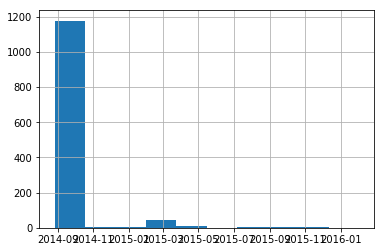

In [325]:
dates.hist()

In [328]:
dt = pd.DatetimeIndex(dates)
pd.crosstab(dt.to_period('M'), columns='Count')

col_0,Count
row_0,
2014-08,1127
2014-09,47
2014-10,3
2014-11,3
2014-12,2
2015-01,1
2015-02,47
2015-04,5
2015-05,5


### Now self_employed. 

Seems OK.

In [329]:
pd.crosstab(data['self_employed'].fillna('NaN'), columns='Count')

col_0,Count
self_employed,
NaN,26
No,1091
Yes,142


### Family history

Looks normal.

In [332]:
pd.crosstab(data['family_history'].fillna('NaN'), columns='Count')

col_0,Count
family_history,
NaN,8
No,762
Yes,489


### Treatment

In [342]:
pd.crosstab(data['treatment'].fillna('NaN'), columns='Count')

col_0,Count
treatment,
NaN,8
No,619
Yes,632


### Work interference

Looks normal. We add a numerical index to 

In [344]:
pd.crosstab(data['work_interfere'].fillna('NaN'), columns='Count')

col_0,Count
work_interfere,
NaN,270
Never,212
Often,140
Rarely,173
Sometimes,464


### Number of employees

Looks normal.

In [345]:
pd.crosstab(data['no_employees'].fillna('NaN'), columns='Count')

col_0,Count
no_employees,
1-5,158
100-500,175
26-100,288
500-1000,60
6-25,289
More than 1000,281
NaN,8


In [343]:
data.columns

Index(['age', 'gender', 'country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'date', 'time'],
      dtype='object')

Then we visualize the data.

Then we clean the data.

AttributeError: 'DataFrame' object has no attribute 'num_columns'